# Cars sals

## Relevant packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

## Load the data

In [2]:
raw_data = pd.read_csv('dataset.csv')
raw_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


## Preprocessing
### Exploring descriptive statics of the variables

In [3]:
raw_data.describe(include='all') 
# .describe() will describe the numerical varibales only
# include = 'all' will describe both numerical and categorical data

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


### Determining the variables of interests
- Registration variable is useless because more than 90% of its values are yes, so is unneded
- Model variable has many dummies (312). Also, a lot of informations from ```Model```, ```Engine```, ```Year``` , ```Brand```  

In [4]:
data = raw_data.drop(['Model','Registration'],axis=1) # 1 for columns and 0 for raws
data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,NaN
freq,936,NaN,1649,NaN,NaN,2019,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,2012.000000


### Dealing with missing values

In [5]:
data.isnull()  
# true stands for missing value

,Brand,Price,Body,Mileage,EngineV,Engine Type,Year
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
4340,False,False,False,False,False,False,False
4341,False,False,False,False,False,False,False
4342,False,False,False,False,False,False,False
4343,False,False,False,False,True,False,False


In [6]:
data.isnull().sum()

Brand            0
Price          172
Body             0
Mileage          0
EngineV        150
Engine Type      0
Year             0
dtype: int64

**Rule of thumb**<br>
if you removing <5% of observations, you are free to just remove all the observations with missing values.

In [7]:
data_no_mv = data.dropna(axis=0)
data_no_mv.isnull().sum()

Brand          0
Price          0
Body           0
Mileage        0
EngineV        0
Engine Type    0
Year           0
dtype: int64

In [8]:
data_no_mv.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,NaN
freq,880,NaN,1534,NaN,NaN,1861,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,2012.000000


### Exploring PDF's

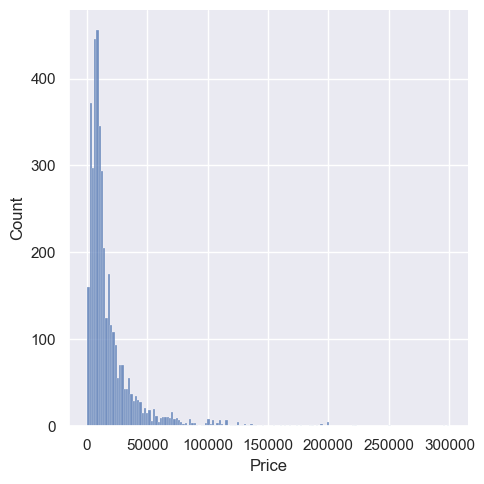

In [9]:
sns.displot(data_no_mv['Price'])

- For optimal results we would looking for ```Normal distribution```
- By simple reading on the PDF graph and describe table we found that obviously we have few outliers in the ```Price``` variable <br>
- ```Outliers``` are observations that lie on abnoraml distance from the other observations in data, they affect the regression dramaticaly and cause coefficient to be inflated
- One way to deal with this is by removing the top 1% of observations
- .quantile() will help us in this

In [10]:
q = data_no_mv['Price'].quantile(0.99) # will max give us the price of 99% of values like 75% , 50% , 25% in describe table 
q

129812.51999999981

In [11]:
data_1 = data_no_mv[data_no_mv['Price']<q]
data_1.describe()

,Price,Mileage,EngineV,Year
count,3984.000000,3984.000000,3984.000000,3984.000000
mean,17837.117460,165.116466,2.743770,2006.292922
std,18976.268315,102.766126,4.956057,6.672745
min,600.000000,0.000000,0.600000,1969.000000
25%,6980.000000,93.000000,1.800000,2002.750000
50%,11400.000000,160.000000,2.200000,2007.000000
75%,21000.000000,230.000000,3.000000,2011.000000
max,129222.000000,980.000000,99.990000,2016.000000


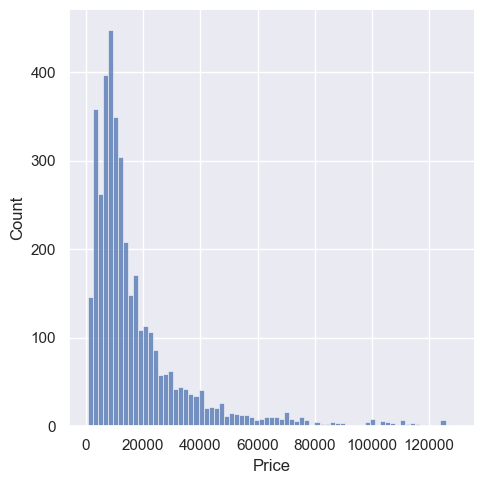

In [12]:
sns.displot(data_1['Price'])

While still far away from the mean but with less outliers, it is acceptably closer

<Axes: xlabel='Mileage', ylabel='Count'>

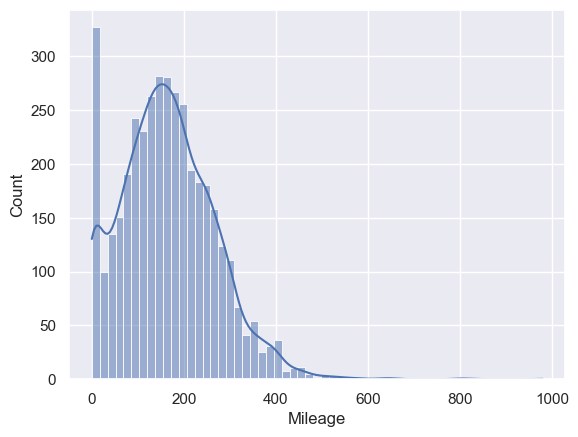

In [13]:
sns.histplot(data_1['Mileage'],kde=True)

In [14]:
q = data_1["Mileage"].quantile(0.99)
q

435.5100000000002

<Axes: xlabel='Mileage', ylabel='Count'>

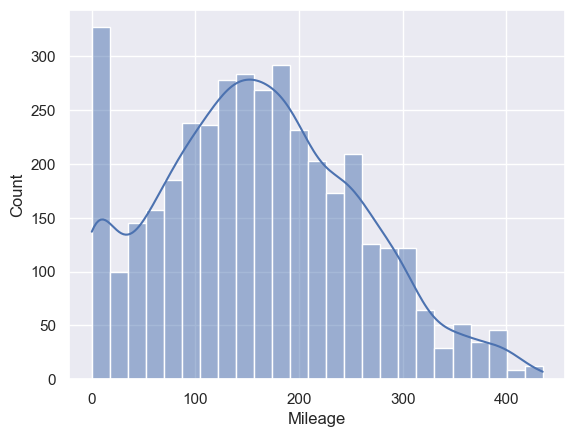

In [15]:
data_2 = data_1[data_1['Mileage']<q]
sns.histplot(data_2['Mileage'],kde=True)

<Axes: xlabel='EngineV', ylabel='Density'>

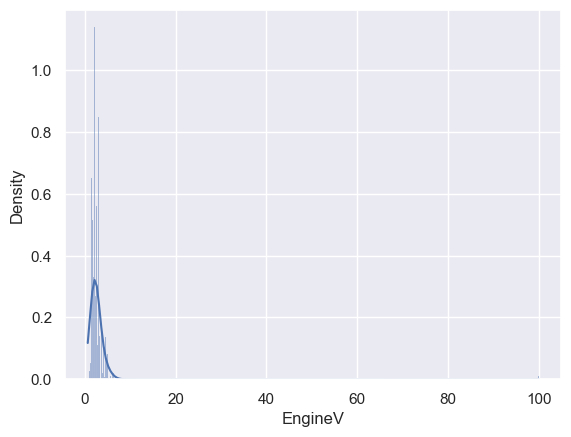

In [16]:
sns.histplot(data_2['EngineV'],kde=True,stat="density")

After quick search we found that engive volume is less then 6.5

<Axes: xlabel='EngineV', ylabel='Count'>

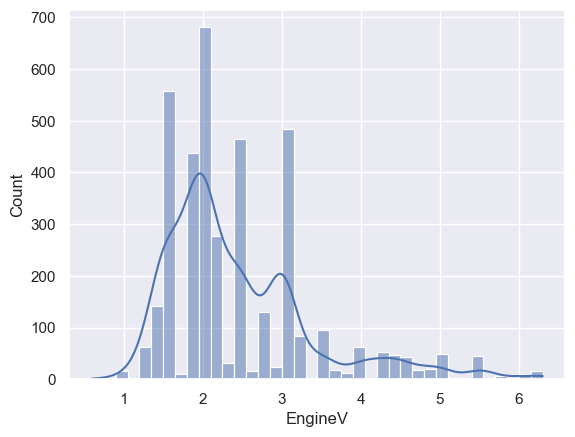

In [17]:
data_3 = data_2[data_2['EngineV']<6.5]
sns.histplot(data_3['EngineV'],kde=True)

<Axes: xlabel='Year', ylabel='Count'>

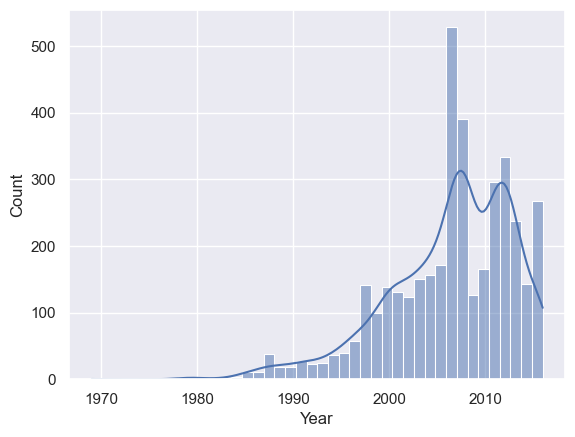

In [18]:
sns.histplot(data_3['Year'],kde=True)

In [19]:
q = data_3['Year'].quantile(0.01)
data_4 = data_3[data_3['Year']>q]

<Axes: xlabel='Year', ylabel='Count'>

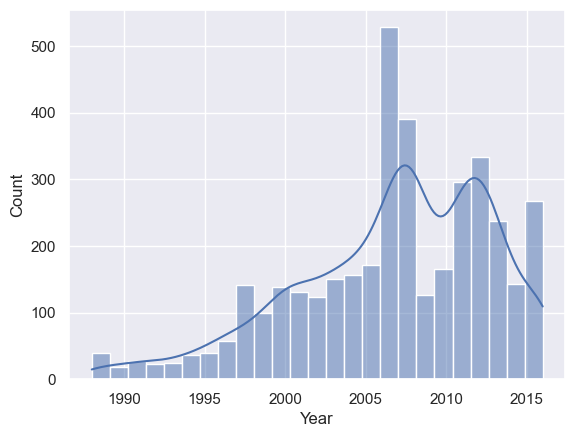

In [20]:
sns.histplot(data_4['Year'],kde=True)

In [21]:
data_cleaned = data_4
data_cleaned

,Brand,Price,Body,Mileage,EngineV,Engine Type,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,2011
...,...,...,...,...,...,...,...
4338,Volkswagen,11500.0,van,163,2.5,Diesel,2008
4339,Toyota,17900.0,sedan,35,1.6,Petrol,2014
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,2014
4341,BMW,6500.0,sedan,1,3.5,Petrol,1999


Notice that currently indecices refer to all the data (including the removed ones), So we sould re-index the cleaned data

In [22]:
data_cleaned = data_cleaned.reset_index(drop=True)

In [23]:
data_cleaned

,Brand,Price,Body,Mileage,EngineV,Engine Type,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,2011
...,...,...,...,...,...,...,...
3862,Volkswagen,11500.0,van,163,2.5,Diesel,2008
3863,Toyota,17900.0,sedan,35,1.6,Petrol,2014
3864,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,2014
3865,BMW,6500.0,sedan,1,3.5,Petrol,1999


In [24]:
data_cleaned.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Year
count,3867,3867.000000,3867,3867.000000,3867.000000,3867,3867.000000
unique,7,NaN,6,NaN,NaN,4,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,NaN
freq,848,NaN,1467,NaN,NaN,1807,NaN
mean,NaN,18194.455679,NaN,160.542539,2.450440,NaN,2006.709853
std,NaN,19085.855165,NaN,95.633291,0.949366,NaN,6.103870
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,1988.000000
25%,NaN,7200.000000,NaN,91.000000,1.800000,NaN,2003.000000
50%,NaN,11700.000000,NaN,157.000000,2.200000,NaN,2008.000000
75%,NaN,21700.000000,NaN,225.000000,3.000000,NaN,2012.000000


### Checking OLS assumptions

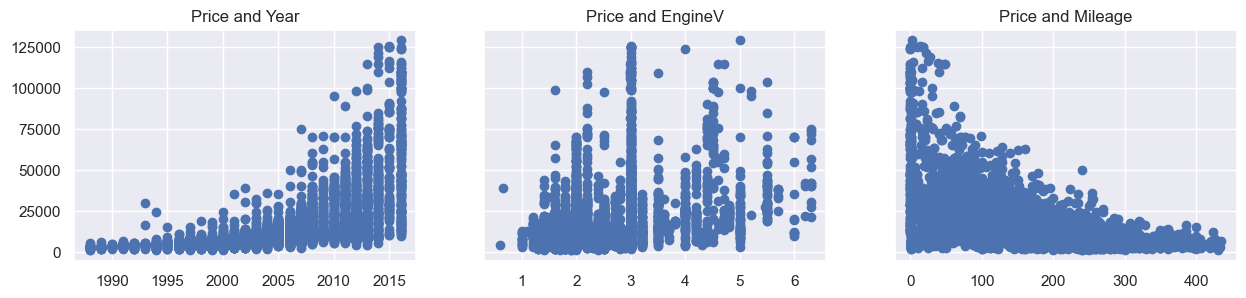

In [25]:
f , (ax1,ax2,ax3) = plt.subplots(1,3,sharey=True,figsize=(15,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['Price'])
ax1.set_title('Price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['Price'])
ax2.set_title('Price and EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['Price'])
ax3.set_title('Price and Mileage')
plt.show()

#### Linearity
It seems our scatters are exponnetioly, So to make them linear we should use ```ln(x)```

<Axes: xlabel='Log_price', ylabel='Count'>

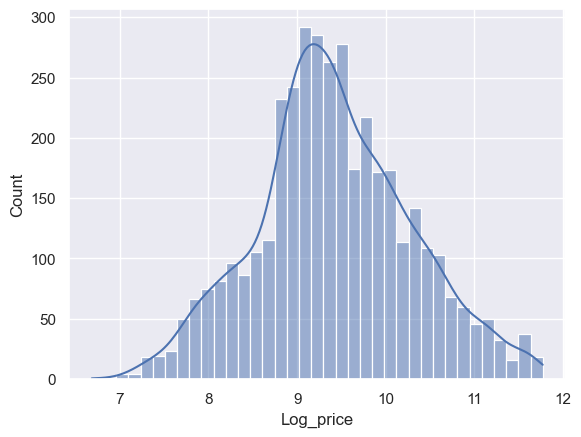

In [26]:
log_price = np.log(data_cleaned['Price'])
data_cleaned['Log_price'] = log_price
sns.histplot(data_cleaned['Log_price'],kde=True)

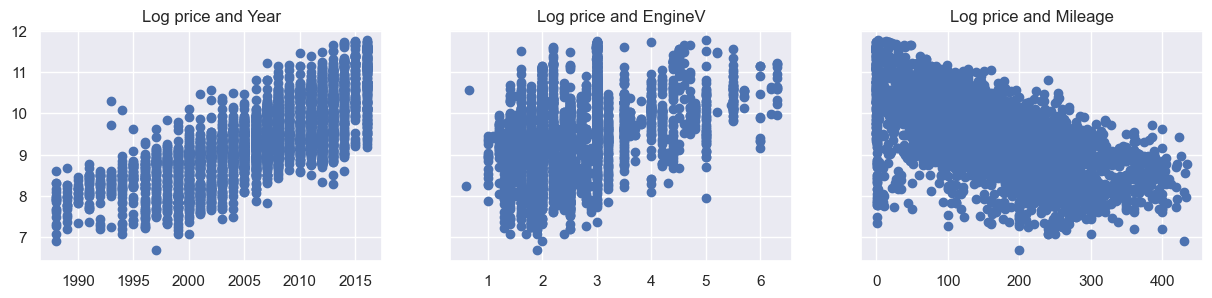

In [27]:
f , (ax1,ax2,ax3) = plt.subplots(1,3,sharey=True,figsize=(15,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['Log_price'])
ax1.set_title('Log price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['Log_price'])
ax2.set_title('Log price and EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['Log_price'])
ax3.set_title('Log price and Mileage')
plt.show()

Now the scatter data seem linear

In [28]:
data_cleaned = data_cleaned.drop(['Price'],axis=1)
data_cleaned.describe()

,Mileage,EngineV,Year,Log_price
count,3867.000000,3867.000000,3867.000000,3867.000000
mean,160.542539,2.450440,2006.709853,9.415703
std,95.633291,0.949366,6.103870,0.876616
min,0.000000,0.600000,1988.000000,6.684612
25%,91.000000,1.800000,2003.000000,8.881836
50%,157.000000,2.200000,2008.000000,9.367344
75%,225.000000,3.000000,2012.000000,9.985068
max,435.000000,6.300000,2016.000000,11.769287


### Multicollinearity

In [29]:
data_cleaned.columns.values

array(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type', 'Year',
       'Log_price'], dtype=object)

In [30]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_cleaned[['Mileage','Year','EngineV']] # only numerical ones
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values,i)for i in range(variables.shape[1])]
vif['Features'] = variables.columns
vif

,VIF,Features
0,3.791584,Mileage
1,10.354854,Year
2,7.662068,EngineV


we will drop ```Year``` because it seem it is the most correlated with others.

In [31]:
data_cleaned_no_mlutic = data_cleaned.drop(['Year'],axis=1)

## Create dummy variables

In [32]:
data_with_dummies = pd.get_dummies(data_cleaned_no_mlutic,drop_first=True)
data_with_dummies.head()

,Mileage,EngineV,Log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol
0,277,2.0,8.342840,True,False,False,False,False,False,False,False,True,False,False,False,False,True
1,427,2.9,8.974618,False,True,False,False,False,False,False,False,False,False,True,False,False,False
2,358,5.0,9.495519,False,True,False,False,False,False,False,False,True,False,False,True,False,False
3,240,4.2,10.043249,False,False,False,False,False,False,False,False,False,False,False,False,False,True
4,120,2.0,9.814656,False,False,False,False,True,False,False,False,False,False,False,False,False,True


In [33]:
data_with_dummies.describe(include='all')

,Mileage,EngineV,Log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol
count,3867.000000,3867.000000,3867.000000,3867,3867,3867,3867,3867,3867,3867,3867,3867,3867,3867,3867,3867,3867
unique,NaN,NaN,NaN,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,NaN,NaN,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,False
freq,NaN,NaN,NaN,3243,3112,3565,3435,3369,3019,3614,3497,2400,3495,3257,3299,3768,2474
mean,160.542539,2.450440,9.415703,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,95.633291,0.949366,0.876616,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,0.600000,6.684612,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,91.000000,1.800000,8.881836,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,157.000000,2.200000,9.367344,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,225.000000,3.000000,9.985068,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Rerrange columns

In [34]:
data_with_dummies.columns.values

array(['Mileage', 'EngineV', 'Log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol'], dtype=object)

In [35]:
cols = ['Log_price','Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol']
data_preprocessed = data_with_dummies[cols]
data_preprocessed.describe()

,Log_price,Mileage,EngineV
count,3867.000000,3867.000000,3867.000000
mean,9.415703,160.542539,2.450440
std,0.876616,95.633291,0.949366
min,6.684612,0.000000,0.600000
25%,8.881836,91.000000,1.800000
50%,9.367344,157.000000,2.200000
75%,9.985068,225.000000,3.000000
max,11.769287,435.000000,6.300000


## Linear regression Model

### Decalre the inputs and the target

In [36]:
targets = data_preprocessed['Log_price']
inputs = data_preprocessed.drop(['Log_price'],axis=1)

In [37]:
targets

0        8.342840
1        8.974618
2        9.495519
3       10.043249
4        9.814656
          ...    
3862     9.350102
3863     9.792556
3864    11.736069
3865     8.779557
3866     9.510445
Name: Log_price, Length: 3867, dtype: float64

In [38]:
inputs

,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol
0,277,2.0,True,False,False,False,False,False,False,False,True,False,False,False,False,True
1,427,2.9,False,True,False,False,False,False,False,False,False,False,True,False,False,False
2,358,5.0,False,True,False,False,False,False,False,False,True,False,False,True,False,False
3,240,4.2,False,False,False,False,False,False,False,False,False,False,False,False,False,True
4,120,2.0,False,False,False,False,True,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3862,163,2.5,False,False,False,False,False,True,False,False,False,False,True,False,False,False
3863,35,1.6,False,False,False,False,True,False,False,False,True,False,False,False,False,True
3864,9,3.0,False,True,False,False,False,False,False,False,True,False,False,False,False,False
3865,1,3.5,True,False,False,False,False,False,False,False,True,False,False,False,False,True


### Scale the data

In [39]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler()

In [40]:
inputs_scaled = scaler.transform(inputs)

In [43]:
inputs_scaled

array([[ 1.2179077 , -0.47452478,  2.27971827, ..., -0.41493781,
        -0.16209221,  1.33267512],
       [ 2.78660201,  0.47359854, -0.43865069, ..., -0.41493781,
        -0.16209221, -0.75037043],
       [ 2.06500263,  2.68588629, -0.43865069, ...,  2.40999971,
        -0.16209221, -0.75037043],
       ...,
       [-1.58482613,  0.57894557, -0.43865069, ..., -0.41493781,
        -0.16209221, -0.75037043],
       [-1.66848982,  1.10568075,  2.27971827, ..., -0.41493781,
        -0.16209221,  1.33267512],
       [-0.38216049, -0.47452478, -0.43865069, ..., -0.41493781,
        -0.16209221, -0.75037043]])

### Train test split

In [45]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(inputs_scaled,targets,test_size=0.2,random_state=1)

### Create the regression

In [46]:
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [47]:
y_hat = reg.predict(x_train)

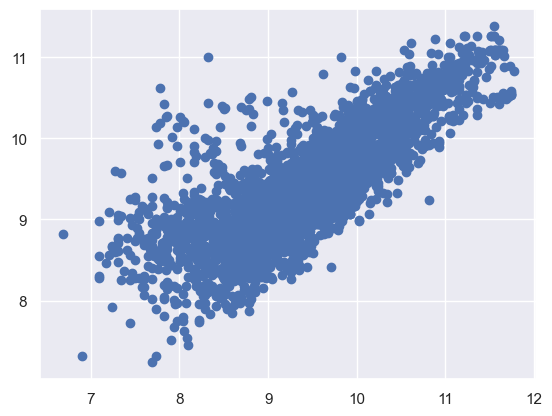

In [48]:
plt.scatter(y_train,y_hat)
plt.show()

<Axes: xlabel='Log_price', ylabel='Count'>

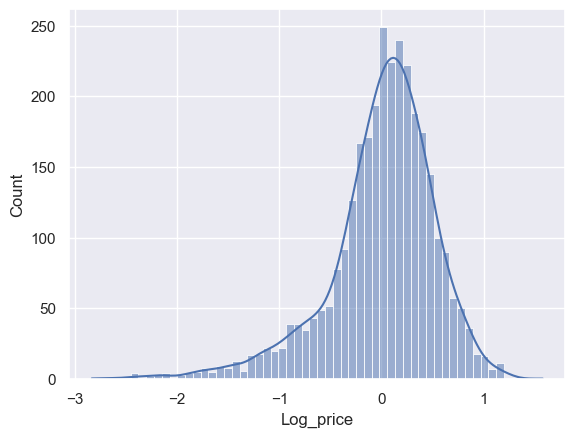

In [50]:
sns.histplot(y_train - y_hat,kde=True)

In [52]:
reg.score(x_train,y_train)

0.6383018827431359

### Finding the weights and bias

In [54]:
reg_summary = pd.DataFrame(inputs.columns.values,columns=['Features'])
reg_summary['weights'] = reg.coef_
reg_summary

,Features,weights
0,Mileage,-0.520685
1,EngineV,0.221791
2,Brand_BMW,0.024784
3,Brand_Mercedes-Benz,0.049711
4,Brand_Mitsubishi,-0.111921
5,Brand_Renault,-0.130129
6,Brand_Toyota,-0.017125
7,Brand_Volkswagen,-0.043901
8,Body_hatch,-0.170784
9,Body_other,-0.103602


#### Weights interception
**Continious variables**:
 - A ```Positive``` weight shows that as a feature increase the log_price increase, and price respectively
 - A ```Negative``` weight shows that as a feature decrease the log_price decrease, and price respectively <br>
 
**Dummies variables**:
 - A ```Positive``` weight shows that the respective category (e.g : Brand) is more expensive than the benchmark (Audi in this case)
 - A ```Negative``` weight shows that the respective category (e.g : Brand) is less expensive than the benchmark (Audi in this case)

## Testing

In [55]:
y_hat_test = reg.predict(x_test)

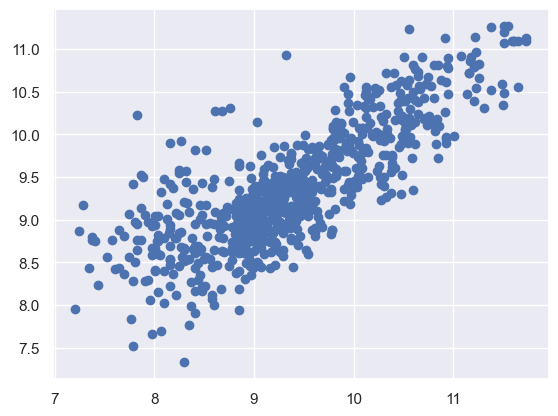

In [56]:
plt.scatter(y_test,y_hat_test)
plt.show()

In [59]:
df_pf = pd.DataFrame(np.exp(y_hat_test),columns=['Prediction']) # data frame performance
df_pf.head()

,Prediction
0,11068.695269
1,6764.944590
2,11974.523525
3,4673.545797
4,6808.544091


In [65]:
y_test = y_test.reset_index(drop=True)
df_pf['Target'] = np.exp(y_test )
df_pf['Residual'] = df_pf['Target'] - df_pf['Prediction']
df_pf['Difference %'] = np.absolute((df_pf['Residual']/df_pf['Target'])*100)
df_pf.head()

,Prediction,Target,Residual,Difference %
0,11068.695269,10000.0,-1068.695269,10.686953
1,6764.944590,3100.0,-3664.944590,118.224019
2,11974.523525,8200.0,-3774.523525,46.030775
3,4673.545797,5300.0,626.454203,11.819891
4,6808.544091,8200.0,1391.455909,16.968975


In [66]:
df_pf.describe()

,Prediction,Target,Residual,Difference %
count,774.000000,774.000000,774.000000,774.000000
mean,15347.398833,17829.164470,2481.765637,46.748264
std,12853.091439,19197.466739,10916.735388,74.975146
min,1527.000835,1350.000000,-44761.187704,0.098872
25%,7459.254493,7000.000000,-2454.377866,12.590882
50%,10853.417468,11000.000000,510.003751,27.683171
75%,18305.580361,20777.812500,3893.809187,46.998022
max,78261.401407,124999.000000,76863.965695,999.434550


In [70]:
pd.options.display.max_rows = 999
pd.set_option('display.float_format',lambda x:'%.2f' % x)
df_pf.sort_values(by=['Difference %'])

,Prediction,Target,Residual,Difference %
716,49548.94,49500.00,-48.94,0.10
248,11687.64,11700.00,12.36,0.11
734,8811.99,8800.00,-11.99,0.14
243,8576.88,8600.00,23.12,0.27
103,9935.30,9900.00,-35.30,0.36
83,8862.40,8900.00,37.60,0.42
189,9905.56,9950.00,44.44,0.45
375,6962.39,7000.00,37.61,0.54
9,11570.67,11500.00,-70.67,0.61
373,8739.51,8800.00,60.49,0.69


## Notes
- Analyse prediction table help us to know which observation we predict it good
- In this case when we go below to the bigger differneces, we note that they have low prices and the prediction higher than target
- so we miss a factor
## How to improve the model
 - Use different set of features
 - Remove a bigger part of the outliers
 - Use different kind of transformations